In [1]:
#import necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
sns.set_theme(style="ticks", color_codes=True)

# Data Collection

In [2]:
#Load the data
data = pd.read_csv("Group 1.csv")

# Data Preparation

In [3]:
#Understanding the dataset taking a look at the first five observations
print(data.head())

   Unnamed: 0 customer_id  gender            location  partner dependents  \
0           0       G1606  Female          Lancashire        0          1   
1           1       F8889  Female               Essex        0          1   
2           2       C5068  Female               Essex        0    Unknown   
3           3       G9820    Male      West Yorkshire        1          1   
4           4       H7261    Male  Greater Manchester        0          1   

   senior  Tenure monthly_cost  package survey     Class  
0       0    20.0          NaN        2      0  Churn=No  
1       0     4.0          NaN        1      5  Churn=No  
2       1     9.0          NaN        2      0  Churn=No  
3       1     9.0          NaN        4      9  Churn=No  
4       0     6.0          NaN        2      5  Churn=No  


In [4]:
#Delete redundant row index
del data['Unnamed: 0']

In [5]:
#Taking a look at the structure of the dataset
print(data.shape)

(7350, 11)


In [6]:
#Understanding the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7350 entries, 0 to 7349
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   customer_id   7350 non-null   object 
 1   gender        7350 non-null   object 
 2   location      7350 non-null   object 
 3   partner       7350 non-null   int64  
 4   dependents    7350 non-null   object 
 5   senior        7350 non-null   int64  
 6   Tenure        7350 non-null   float64
 7   monthly_cost  79 non-null     object 
 8   package       7350 non-null   int64  
 9   survey        7350 non-null   object 
 10  Class         7291 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 631.8+ KB


In [7]:
#looking at the number of unique variables in each feature
data.nunique()

customer_id     6770
gender             2
location          17
partner            2
dependents         3
senior             2
Tenure            57
monthly_cost      76
package            4
survey            12
Class              3
dtype: int64

In [8]:
#There are duplicate observations in our data set so we drop them
data = data.drop_duplicates()

In [9]:
#The new structure after dropping duplicates
data.shape

(7000, 11)

In [10]:
#check for missing values in each feature
data.isnull().sum()

customer_id        0
gender             0
location           0
partner            0
dependents         0
senior             0
Tenure             0
monthly_cost    6924
package            0
survey             0
Class             56
dtype: int64

In [11]:
#class has null values so let us inspect it and see its values
data['Class'].unique()

array(['Churn=No', 'Churn=Yes', nan, 'Y$e$s$$'], dtype=object)

In [12]:
#replace missing values with 0
data['Class'] = data['Class'].fillna(0)

In [13]:
#replace missing values with 0
data['monthly_cost'] = data['monthly_cost'].fillna(0)

In [14]:
#DEaling with missing values
data.isnull().sum()

customer_id     0
gender          0
location        0
partner         0
dependents      0
senior          0
Tenure          0
monthly_cost    0
package         0
survey          0
Class           0
dtype: int64

In [15]:
#feature gender we set males = 0 and females = 1
data['gender'].replace(['Male', 'Female'], [0, 1], inplace=True)

In [16]:
data['gender'].unique()

array([1, 0])

In [17]:
#class here if churn=No we set it to 0 and churn=Yes is set to 1
data['Class'].replace(['Churn=No', 'Churn=Yes'], [0, 1], inplace=True)

In [18]:
data['Class'].value_counts()

0          5000
1          1981
Y$e$s$$      19
Name: Class, dtype: int64

In [19]:
#replace the anomaly yes ('Y$e$s$$') with a 1 for churn=yes
data['Class'].replace(['Y$e$s$$'], [1], inplace=True)

In [20]:
data['Class'].value_counts()

0    5000
1    2000
Name: Class, dtype: int64

In [21]:
data['dependents'].value_counts()

1          3363
Unknown    2103
0          1534
Name: dependents, dtype: int64

In [22]:
#need to set the unknown variables in dependent to 1 because it is the most frequent item
data['dependents'].replace(['Unknown'], [1], inplace=True)

In [23]:
data['dependents'].replace(['0','1'], [0, 1], inplace=True)

In [24]:
data['dependents'].value_counts()

1    5466
0    1534
Name: dependents, dtype: int64

In [25]:
#Taking a look at the survey feature 
data['survey'].value_counts()

6           1136
7            955
5            879
2            706
4            642
1            602
3            592
No reply     564
8            510
0            203
9            182
10            29
Name: survey, dtype: int64

In [26]:
#set the no reply variables in survey to 6 as it has the highest frequency
data['survey'].replace(['No reply'], ['6'], inplace=True)

In [27]:
#reformatting the monthly cost column
for i in data.index:
    if (data['Tenure'].loc[i] <= 25):
        if(data['package'].loc[i] == 1):
            data['monthly_cost'].loc[i] = (26 - ((26*data['Tenure'].loc[i]*2)/100))

        elif(data['package'].loc[i] == 2):
            data['monthly_cost'].loc[i] = (34 - ((34*data['Tenure'].loc[i]*2)/100))

        elif(data['package'].loc[i] == 3):
            data['monthly_cost'].loc[i] = (40 - ((40*data['Tenure'].loc[i]*2)/100))

        elif(data['package'].loc[i] == 4):
            data['monthly_cost'].loc[i] = (46 - ((46*data['Tenure'].loc[i]*2)/100))
    else :
        if(data['package'].loc[i] == 1):
            data['monthly_cost'].loc[i] = 26
        elif(data['package'].loc[i] == 2):
            data['monthly_cost'].loc[i] = 34
        elif(data['package'].loc[i] == 3):
            data['monthly_cost'].loc[i] = 40
        elif(data['package'].loc[i] == 4):
            data['monthly_cost'].loc[i] = 46

/var/folders/gb/w4d_j72s4vb5n9fdl5qcclbh0000gn/T/ipykernel_21295/2328613111.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['monthly_cost'].loc[i] = (34 - ((34*data['Tenure'].loc[i]*2)/100))
/var/folders/gb/w4d_j72s4vb5n9fdl5qcclbh0000gn/T/ipykernel_21295/2328613111.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['monthly_cost'].loc[i] = (26 - ((26*data['Tenure'].loc[i]*2)/100))
/var/folders/gb/w4d_j72s4vb5n9fdl5qcclbh0000gn/T/ipykernel_21295/2328613111.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://panda

In [28]:
data.monthly_cost

0        20.4
1       23.92
2       27.88
3       37.72
4       29.92
        ...  
7345     28.8
7346     26.4
7347    45.08
7348     29.6
7349    31.28
Name: monthly_cost, Length: 7000, dtype: object

In [29]:
data.monthly_cost = data.monthly_cost.astype(int)

In [30]:
data.head()

,customer_id,gender,location,partner,dependents,senior,Tenure,monthly_cost,package,survey,Class
0,G1606,1,Lancashire,0,1,0,20.0,20,2,0,0
1,F8889,1,Essex,0,1,0,4.0,23,1,5,0
2,C5068,1,Essex,0,1,1,9.0,27,2,0,0
3,G9820,0,West Yorkshire,1,1,1,9.0,37,4,9,0
4,H7261,0,Greater Manchester,0,1,0,6.0,29,2,5,0


In [31]:
data.dtypes

customer_id      object
gender            int64
location         object
partner           int64
dependents        int64
senior            int64
Tenure          float64
monthly_cost      int64
package           int64
survey           object
Class             int64
dtype: object

In [32]:
data.nunique()

customer_id     6770
gender             2
location          17
partner            2
dependents         2
senior             2
Tenure            57
monthly_cost      38
package            4
survey            11
Class              2
dtype: int64

In [33]:
data['survey'].unique()

array(['0', '5', '9', '2', '8', '7', '6', '1', '4', '3', '10'],
      dtype=object)

In [34]:
data.survey = data.survey.astype(int)

In [35]:
print(data.shape)

(7000, 11)


In [36]:
#create a new column to view those who are eligible for discount 
data['eligble'] = 'Yes'

In [37]:
#assigning the new column its values based on tenure value for each observation
for i in data.index:
    if(data['Tenure'].loc[i] <= 25):
        data['eligble'].loc[i] = 'Yes'
    else:
        data['eligble'].loc[i] = 'No'

/var/folders/gb/w4d_j72s4vb5n9fdl5qcclbh0000gn/T/ipykernel_21295/1194178303.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['eligble'].loc[i] = 'Yes'
/var/folders/gb/w4d_j72s4vb5n9fdl5qcclbh0000gn/T/ipykernel_21295/1194178303.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['eligble'].loc[i] = 'No'


In [38]:
#Viewing the tenure variable
data['Tenure'].value_counts()

 1.000000     650
 0.000000     623
 8.000000     437
 9.000000     421
 10.000000    388
 7.000000     373
 12.000000    365
 13.000000    351
 11.000000    336
 2.000000     333
 14.000000    307
 15.000000    294
 6.000000     294
 16.000000    265
 5.000000     251
 17.000000    220
 4.000000     179
 18.000000    170
 3.000000     164
 19.000000    139
 20.000000     99
 21.000000     73
 22.000000     58
 23.000000     38
 24.000000     17
-1.000000      16
 25.000000     11
-2.828427      10
-3.872983       9
-3.000000       9
-1.414214       8
 26.000000      8
-3.316625       8
-3.162278       7
-2.236068       7
-4.242641       6
-2.449490       6
-2.645751       6
-4.000000       5
-3.605551       4
-2.000000       4
 27.000000      4
-3.464102       4
-4.123106       4
-4.472136       3
 28.000000      3
-1.732051       2
 29.000000      2
-5.000000       1
-5.099020       1
-4.582576       1
-4.795832       1
-3.741657       1
-4.690416       1
-4.358899       1
-5.196152 

In [39]:
data.head()

,customer_id,gender,location,partner,dependents,senior,Tenure,monthly_cost,package,survey,Class,eligble
0,G1606,1,Lancashire,0,1,0,20.0,20,2,0,0,Yes
1,F8889,1,Essex,0,1,0,4.0,23,1,5,0,Yes
2,C5068,1,Essex,0,1,1,9.0,27,2,0,0,Yes
3,G9820,0,West Yorkshire,1,1,1,9.0,37,4,9,0,Yes
4,H7261,0,Greater Manchester,0,1,0,6.0,29,2,5,0,Yes


In [40]:
#statistics of the data set
data.describe()

,gender,partner,dependents,senior,Tenure,monthly_cost,package,survey,Class
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,0.502286,0.548714,0.780857,0.167571,8.688011,28.966286,2.379571,4.806571,0.285714
std,0.500030,0.497657,0.413695,0.373512,6.331760,7.449425,1.164709,2.316446,0.451786
min,0.000000,0.000000,0.000000,0.000000,-5.196152,13.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,3.000000,24.000000,1.000000,3.000000,0.000000
50%,1.000000,1.000000,1.000000,0.000000,9.000000,28.000000,2.000000,5.000000,0.000000
75%,1.000000,1.000000,1.000000,0.000000,13.000000,34.000000,4.000000,6.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,30.000000,50.000000,4.000000,10.000000,1.000000


In [41]:
#Check to make sure we have no duplicates
data.duplicated().sum()

0

# Exploratory Data Analysis

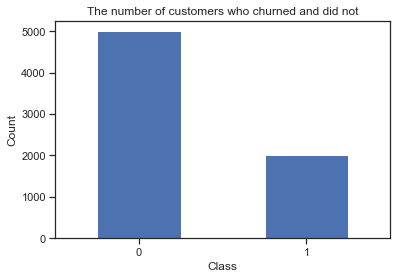

In [42]:
#visualize the data target
data['Class'].value_counts().plot(kind='bar')
plt.title("The number of customers who churned and did not")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.savefig('Visualizing the class feature.png', dpi=400)
plt.show()

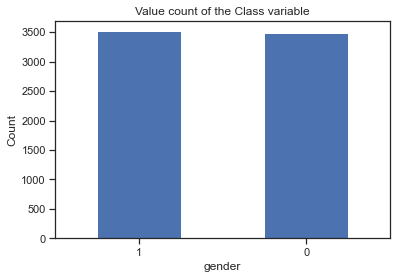

In [43]:
#visualizing the gender variable
data['gender'].value_counts().plot(kind='bar')
plt.title("Value count of the Class variable")
plt.xlabel("gender")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

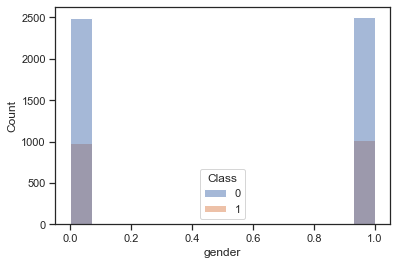

In [44]:
#Visualizing the class feature in relation to gender
sns.histplot(x="gender", hue="Class", data=data)
plt.savefig('Visualizing the class feature in relation to gender.png', dpi=400)

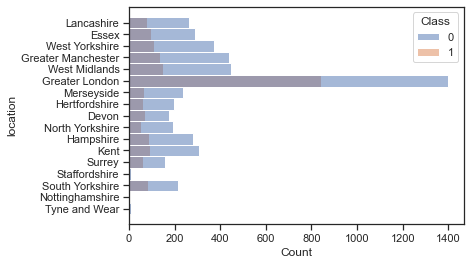

In [45]:
#Visualizing the class feature in relation to location
sns.histplot(y="location", hue="Class", data=data)
plt.savefig('Visualizing the class feature in relation to location.png', dpi=400)

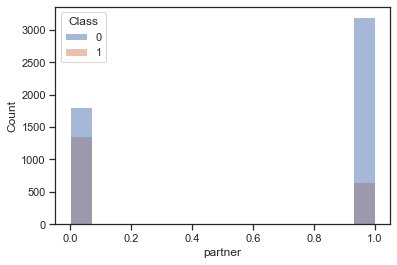

In [46]:
#Visualizing the class feature in relation to partner
sns.histplot(x="partner", hue="Class", data=data)
plt.savefig('Visualizing the class feature in relation to partner.png', dpi=400)

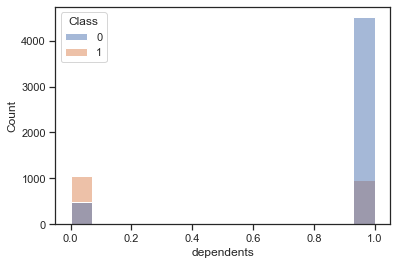

In [47]:
#Visualizing the class feature in relation to dependents
sns.histplot(x="dependents", hue="Class", data=data)
plt.savefig('Visualizing the class feature in relation to dependents.png', dpi=400)

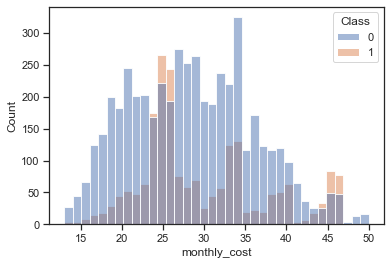

In [48]:
#Visualizing the class feature in relation to monthly_cost
sns.histplot(x="monthly_cost", hue="Class", data=data)
plt.savefig('Visualizing the class feature in relation to monthly_cost.png', dpi=400)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 88.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 75.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 73.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 81.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


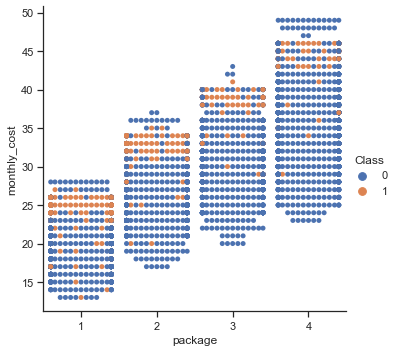

In [81]:
#catplot showing the package against monthly cost based on Class variable
sns.catplot(x="package",y="monthly_cost", hue="Class", kind="swarm",data=data)
plt.savefig('Visualizing relation between monthly cost and package based on Class.png', dpi=400)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 68.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 68.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


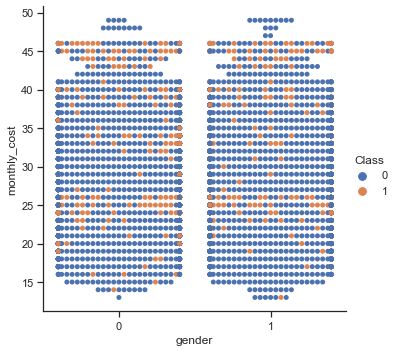

In [82]:
#catplot showing the gender against monthly cost based on Class variable
sns.catplot(x="gender",y="monthly_cost", hue="Class", kind="swarm",data=data)
plt.savefig('Visualizing relation between monthly cost and gender based on Class.png', dpi=400)

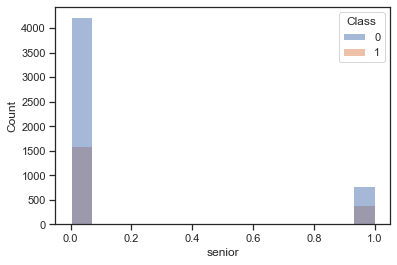

In [51]:
#Visualizing the class feature in relation to senior
sns.histplot(x="senior", hue="Class", data=data)
plt.savefig('Visualizing the class feature in relation to senior.png', dpi=400)

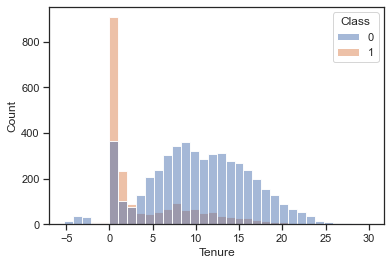

In [52]:
#Visualizing the class feature in relation to Tenure
sns.histplot(x="Tenure", hue="Class", data=data)
plt.savefig('Visualizing the class feature in relation to Tenure.png', dpi=400)

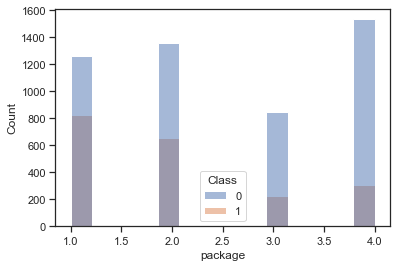

In [53]:
#Visualizing the class feature in relation to package
sns.histplot(x="package", hue="Class", data=data)
plt.savefig('Visualizing the class feature in relation to package.png', dpi=400)

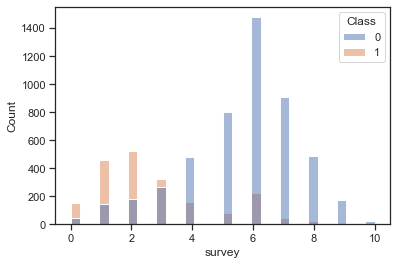

In [54]:
#Visualizing the class feature in relation to survey
sns.histplot(x="survey", hue="Class", data=data)
plt.savefig('Visualizing the class feature in relation to survey.png', dpi=400)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 84.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 84.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 74.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 82.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


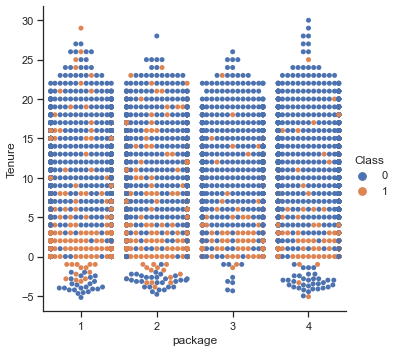

In [55]:
#catplot showing the relation between package, tenure based on Class notice the outliers at the bottom and top
sns.catplot(x="package", y="Tenure", hue="Class", kind="swarm",data=data)
plt.savefig('Visualizing new relation.png', dpi=400)

<Figure size 1080x576 with 0 Axes>

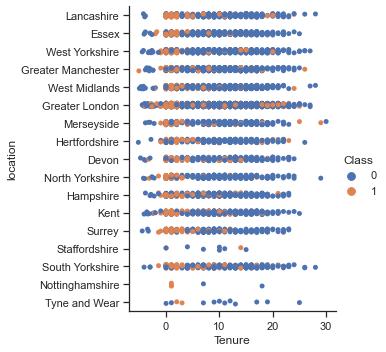

In [56]:
#catplot showing the relation between location, tenure based on Class notice the outliers at the bottom and top
plt.figure(figsize=(15,8))
sns.catplot(x="Tenure", y="location", hue="Class",data=data,)
plt.savefig('Visualizing new relation2.png', dpi=400)

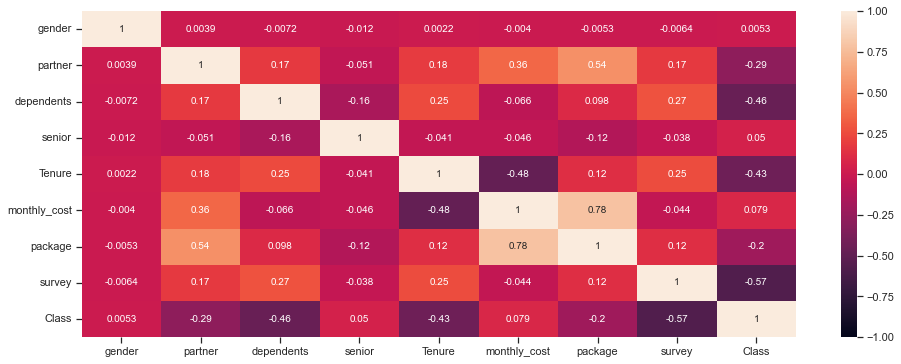

In [57]:
#Heat map showing correlation between our data set features
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True)
plt.savefig('correlation.png', dpi=400)

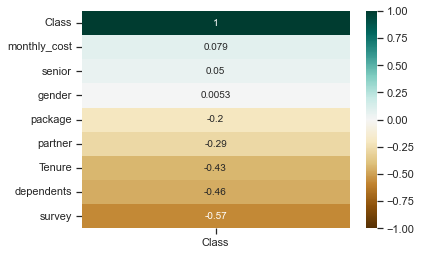

In [58]:
#Heat map corralation of the Class Variable
heatmap = sns.heatmap(data.corr()[['Class']].sort_values(by='Class', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')

In [59]:
#peak into the statistics once again
data.describe()

,gender,partner,dependents,senior,Tenure,monthly_cost,package,survey,Class
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,0.502286,0.548714,0.780857,0.167571,8.688011,28.966286,2.379571,4.806571,0.285714
std,0.500030,0.497657,0.413695,0.373512,6.331760,7.449425,1.164709,2.316446,0.451786
min,0.000000,0.000000,0.000000,0.000000,-5.196152,13.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,3.000000,24.000000,1.000000,3.000000,0.000000
50%,1.000000,1.000000,1.000000,0.000000,9.000000,28.000000,2.000000,5.000000,0.000000
75%,1.000000,1.000000,1.000000,0.000000,13.000000,34.000000,4.000000,6.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,30.000000,50.000000,4.000000,10.000000,1.000000


# Data Pre Processing 

In [60]:
#Dealing with outliers

#finding the outliers in our dataset
# calculate Q1 and Q3
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)

# calculate the IQR
IQR = Q3 - Q1

# filter the dataset with the IQR
IQR_outliers = data[((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
IQR_outliers

/var/folders/gb/w4d_j72s4vb5n9fdl5qcclbh0000gn/T/ipykernel_21295/3807471682.py:12: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  IQR_outliers = data[((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]


,customer_id,gender,location,partner,dependents,senior,Tenure,monthly_cost,package,survey,Class,eligble
2,C5068,1,Essex,0,1,1,9.0,27,2,0,0,Yes
3,G9820,0,West Yorkshire,1,1,1,9.0,37,4,9,0,Yes
5,K5319,0,Greater Manchester,1,0,0,1.0,33,2,2,1,Yes
13,K5861,1,Greater London,0,0,1,7.0,29,2,6,1,Yes
14,I4460,1,Lancashire,1,0,0,3.0,37,3,1,1,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
7339,E4658,1,West Midlands,1,0,0,13.0,34,4,5,0,Yes
7341,C4482,1,Greater London,0,0,0,0.0,26,1,2,1,Yes
7344,K2752,1,West Midlands,0,0,0,3.0,24,1,1,1,Yes
7347,J8171,0,Greater London,1,0,0,1.0,45,4,1,1,Yes


In [61]:
#removing the outliers from the data
data = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
data.shape

/var/folders/gb/w4d_j72s4vb5n9fdl5qcclbh0000gn/T/ipykernel_21295/925061628.py:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]


(4718, 12)

In [62]:
#checking to verify the data is imbalanced
data['Class'].value_counts()

0    3962
1     756
Name: Class, dtype: int64

In [63]:
#balancing the dataset
count = data['Class'].value_counts()[1]
count 

New_0_total = count*1.5
New_0_total

1134.0

In [64]:
#balancing the dataset
count = data['Class'].value_counts()[1]
count 

New_0_total = count*1.5
New_0_total

Newclass0Data = data.loc[data['Class'] == 0]
Newclass0Data

Newclass1Data =  data.loc[data['Class'] == 1]
Newclass1Data

randClass0Data = Newclass0Data.sample(n=1134)
randClass0Data

New_expanded_data = randClass0Data.append(Newclass1Data)
New_expanded_data

/var/folders/gb/w4d_j72s4vb5n9fdl5qcclbh0000gn/T/ipykernel_21295/1534689225.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  New_expanded_data = randClass0Data.append(Newclass1Data)


,customer_id,gender,location,partner,dependents,senior,Tenure,monthly_cost,package,survey,Class,eligble
668,J5129,1,Kent,1,1,0,16.0,31,4,6,0,Yes
4222,G5659,1,Greater London,0,1,0,20.0,15,1,6,0,Yes
7103,F9112,1,Greater London,1,1,0,14.0,33,4,8,0,Yes
604,F1892,1,Essex,1,1,0,10.0,32,3,8,0,Yes
1921,B9292,0,Greater London,1,1,0,0.0,46,4,3,0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
7306,G1355,0,Hampshire,0,1,0,2.0,24,1,2,1,Yes
7313,G8827,0,Greater London,0,1,0,11.0,20,1,1,1,Yes
7325,I8318,0,North Yorkshire,0,1,0,0.0,34,2,2,1,Yes
7331,J2983,1,Essex,0,1,0,0.0,34,2,3,1,Yes


In [65]:
#checking the new values of the balanced data set
New_expanded_data['Class'].value_counts()

0    1134
1     756
Name: Class, dtype: int64

In [66]:
del New_expanded_data['eligble']

In [67]:
#Normalizing monthly cost and tenure

# Copying original dataframe
df_data = New_expanded_data.copy()

scaler = StandardScaler()
num_cols = [ 'Tenure', 'monthly_cost']
df_data[num_cols] = scaler.fit_transform(New_expanded_data[num_cols])

df_data.head()

,customer_id,gender,location,partner,dependents,senior,Tenure,monthly_cost,package,survey,Class
668,J5129,1,Kent,1,1,0,1.264786,0.239432,4,6,0
4222,G5659,1,Greater London,0,1,0,1.882900,-1.798977,1,6,0
7103,F9112,1,Greater London,1,1,0,0.955728,0.494233,4,8,0
604,F1892,1,Essex,1,1,0,0.337614,0.366833,3,8,0
1921,B9292,0,Greater London,1,1,0,-1.207673,2.150441,4,3,0


In [68]:
df_data.shape

(1890, 11)

In [69]:
del df_data['customer_id']

In [70]:
del df_data['location']

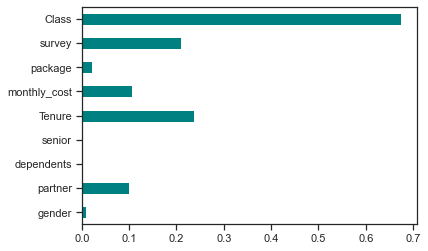

In [71]:
#Feature selection using Importance 

X= df_data
Y = df_data['Class']
importances = mutual_info_classif(X, Y)
feat_importances = pd.Series(importances, df_data.columns[0:len(df_data.columns)])
feat_importances.plot(kind="barh", color="teal")
plt.savefig('features.png', dpi=400)
plt.show()

In [72]:
df_data_model = df_data[['survey','package','Tenure','partner','monthly_cost']].copy()
df_data_model

,survey,package,Tenure,partner,monthly_cost
668,6,4,1.264786,1,0.239432
4222,6,1,1.882900,0,-1.798977
7103,8,4,0.955728,1,0.494233
604,8,3,0.337614,1,0.366833
1921,3,4,-1.207673,1,2.150441
...,...,...,...,...,...
7306,2,1,-0.898616,0,-0.652372
7313,1,1,0.492142,0,-1.161974
7325,2,2,-1.207673,0,0.621634
7331,3,2,-1.207673,0,0.621634


# Building And Model Evaluation

In [73]:
#Splitting the data set into train and test

# Select Features
feature = df_data_model

# Select Target
target = df_data['Class']

# Set Training and Testing Data
X_train, X_test, y_train, y_test = train_test_split(feature , target, 
                                                    shuffle = True, 
                                                    test_size=0.2, 
                                                    random_state=1)

# Show the Training and Testing Data
print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)

Shape of training feature: (1512, 5)
Shape of testing feature: (378, 5)
Shape of training label: (1512,)
Shape of training label: (378,)


In [74]:
#Function to help calculate evaluation of each model faster
def evaluation(model, x_test, y_test):

    # Predict Test Data 
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    
    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'cm': cm}

In [75]:
# Building Decision Tree model 
dtc = tree.DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)

# Evaluate Model
dtc_eval = evaluation(dtc, X_test, y_test)

# Print result
print('Accuracy:', dtc_eval['acc'])
print('Precision:', dtc_eval['prec'])
print('Recall:', dtc_eval['rec'])
print('F1 Score:', dtc_eval['f1'])
print('Confusion Matrix:\n', dtc_eval['cm'])

Accuracy: 0.8650793650793651
Precision: 0.8246753246753247
Recall: 0.8410596026490066
F1 Score: 0.8327868852459016
Confusion Matrix:
 [[200  27]
 [ 24 127]]


In [76]:
# Building Random Forest model 
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)

# Evaluate Model
rf_eval = evaluation(rf, X_test, y_test)

# Print result
print('Accuracy:', rf_eval['acc'])
print('Precision:', rf_eval['prec'])
print('Recall:', rf_eval['rec'])
print('F1 Score:', rf_eval['f1'])
print('Confusion Matrix:\n', rf_eval['cm'])

Accuracy: 0.8783068783068783
Precision: 0.8343949044585988
Recall: 0.8675496688741722
F1 Score: 0.8506493506493507
Confusion Matrix:
 [[201  26]
 [ 20 131]]


In [77]:
# Building Naive Bayes model 
nb = GaussianNB()
nb.fit(X_train, y_train)

# Evaluate Model
nb_eval = evaluation(nb, X_test, y_test)

# Print result
print('Accuracy:', nb_eval['acc'])
print('Precision:', nb_eval['prec'])
print('Recall:', nb_eval['rec'])
print('F1 Score:', nb_eval['f1'])
print('Confusion Matrix:\n', nb_eval['cm'])

Accuracy: 0.8677248677248677
Precision: 0.8136645962732919
Recall: 0.8675496688741722
F1 Score: 0.8397435897435896
Confusion Matrix:
 [[197  30]
 [ 20 131]]


In [78]:
# Building KNN model 
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Evaluate Model
knn_eval = evaluation(knn, X_test, y_test)

# Print result
print('Accuracy:', knn_eval['acc'])
print('Precision:', knn_eval['prec'])
print('Recall:', knn_eval['rec'])
print('F1 Score:', knn_eval['f1'])
print('Confusion Matrix:\n', knn_eval['cm'])

Accuracy: 0.8756613756613757
Precision: 0.8333333333333334
Recall: 0.8609271523178808
F1 Score: 0.8469055374592833
Confusion Matrix:
 [[201  26]
 [ 21 130]]


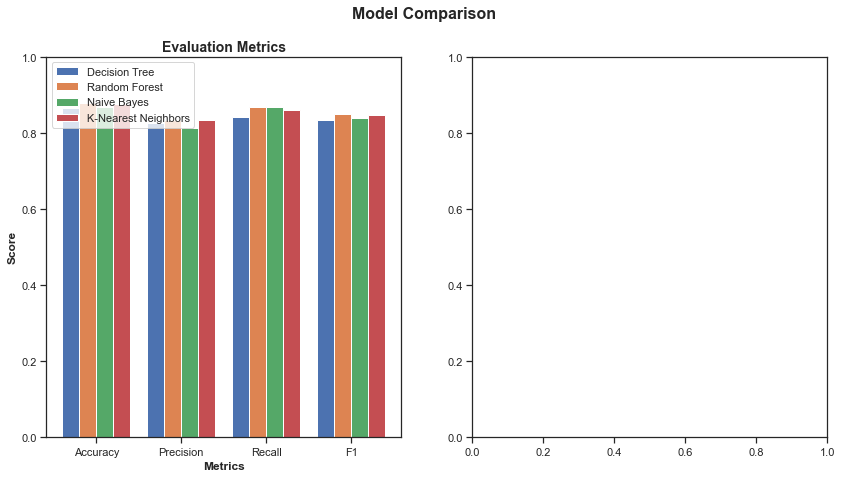

In [79]:
# Intitialize figure with two plots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.2
dtc_score = [dtc_eval['acc'], dtc_eval['prec'], dtc_eval['rec'], dtc_eval['f1']]
rf_score = [rf_eval['acc'], rf_eval['prec'], rf_eval['rec'], rf_eval['f1']]
nb_score = [nb_eval['acc'], nb_eval['prec'], nb_eval['rec'], nb_eval['f1']]
knn_score = [knn_eval['acc'], knn_eval['prec'], knn_eval['rec'], knn_eval['f1']]

## Set position of bar on X axis
r1 = np.arange(len(dtc_score))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

## Make the plot
ax1.bar(r1, dtc_score, width=barWidth, edgecolor='white', label='Decision Tree')
ax1.bar(r2, rf_score, width=barWidth, edgecolor='white', label='Random Forest')
ax1.bar(r3, nb_score, width=barWidth, edgecolor='white', label='Naive Bayes')
ax1.bar(r4, knn_score, width=barWidth, edgecolor='white', label='K-Nearest Neighbors')

## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(dtc_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

## Create legend & title
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

plt.show()